In [24]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import loguniform
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
%matplotlib inline
import os
from collections import Counter

In [25]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = 'e3c11603b207c8253d21825eae59c7bc'
os.environ["KAGGLE_USERNAME"] = 'gauravmanish834'

!kaggle datasets download -d jessicali9530/lfw-dataset


!unzip "lfw-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Si

In [26]:
#This code can be used to extract pretrained CNN (ResNet) Features.
#It takes Image Path and returns 2048-dimensional feature.
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import cv2

# Load pre-trained ResNet-50 model
resnet = models.resnet50(pretrained=True)
# Remove the last fully connected layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
# Set the model to evaluation mode
resnet.eval()

# Define a function to extract features from an image
def extract_features(image, model):
    # Load and preprocess the image
    image = image.convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image)
    # Add batch dimension
    image = image.unsqueeze(0)
    # Extract features
    with torch.no_grad():
        features = model(image)
    # Remove the batch dimension
    features = features.squeeze(0)
    return features




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
# lfw_folder = '/content/lfw-deepfunneled/lfw-deepfunneled'
# X, y = [], []
# for folder_name in os.listdir(lfw_folder):
#     folder_path = os.path.join(lfw_folder, folder_name)
#     if os.path.isdir(folder_path):
#         num_images = len(os.listdir(folder_path))
#         if num_images > 70:
#             for image_name in os.listdir(folder_path):
#                 image_path = os.path.join(folder_path, image_name)
#                 image = imread(image_path)
#                 # hog_feature = compute_hog(image)
#                 # lbp_feature = calcLBP(image)
#                 cnn_feature = extract_features(image_path, resnet).numpy()
#                 # hog_feature = hog_feature.reshape(-1)
#                 # lbp_feature = lbp_feature.reshape(-1)
#                 cnn_feature = cnn_feature.flatten()
#                 # combined_feature = np.concatenate((cnn_feature))

#                 X.append(cnn_feature)
#                 y.append(folder_name)

In [28]:
# X=np.array(X)
# y=np.array(y)

In [29]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier=KNeighborsClassifier(n_neighbors=5)
# knn_classifier.fit(X_train,y_train)
# y_pred= knn_classifier.predict(X_test)

In [31]:
# accuracy_score=accuracy_score(y_test,y_pred)
# print(accuracy_score)

In [32]:
lfw_folder = '/content/lfw-deepfunneled/lfw-deepfunneled'
X, y = [], []
for folder_name in os.listdir(lfw_folder):
    folder_path = os.path.join(lfw_folder, folder_name)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        if num_images > 70:
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                image = imread(image_path)
                X.append(image)
                y.append(folder_name)

In [33]:
X=np.array(X)
y=np.array(y)

In [34]:
print(X.shape)

(1288, 250, 250, 3)


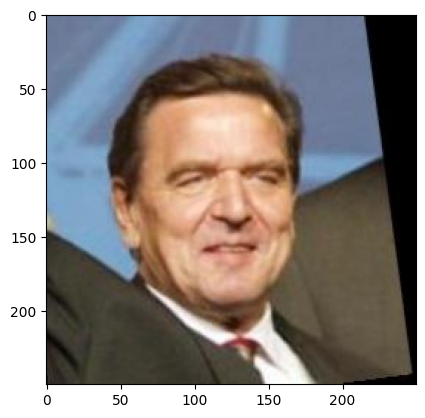

In [35]:
plt.imshow(X[0])

In [36]:
arr = np.unique(y)

In [49]:
arr

array(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Hugo_Chavez', 'Tony_Blair'], dtype='<U17')

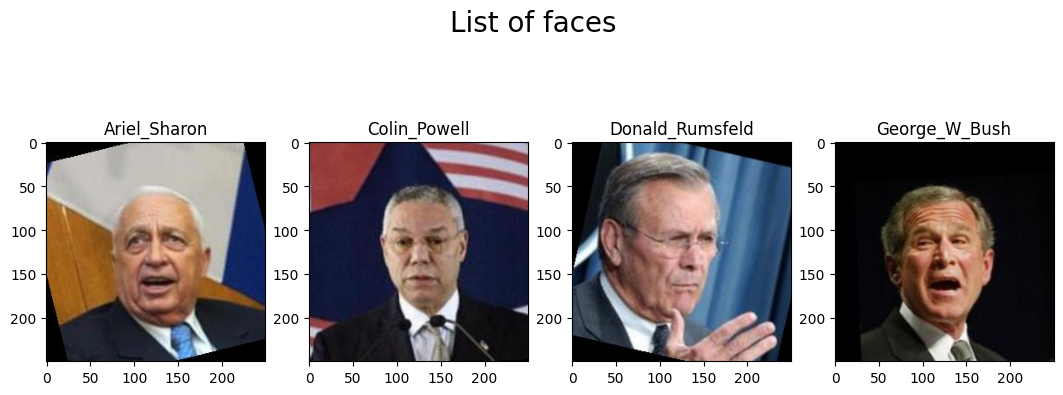

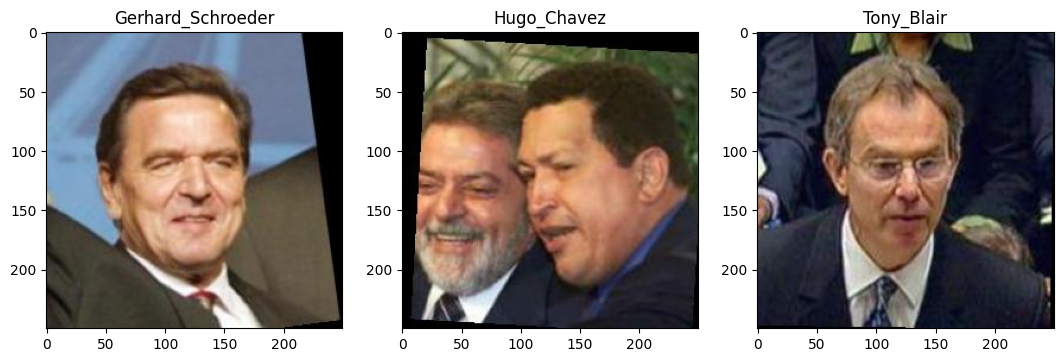

In [37]:
x1=[]
y1=[]
for i in range(arr.shape[0]):
  for j in range(X.shape[0]):
    if(y[j]==arr[i]):
      x1.append(X[j])
      y1.append(arr[i])
      break
fig, ax = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.suptitle('List of faces', fontsize=20)
ax[0].imshow(x1[0])
ax[0].title.set_text(y1[0])
ax[1].imshow(x1[1])
ax[1].title.set_text(y1[1])

ax[2].imshow(x1[2])
ax[2].title.set_text(y1[2])


ax[3].imshow(x1[3])
ax[3].title.set_text(y1[3])

fig, ax = plt.subplots(1,3)
fig.set_figwidth(13)
ax[0].imshow(x1[4])
ax[0].title.set_text(y1[4])

ax[1].imshow(x1[5])
ax[1].title.set_text(y1[5])

ax[2].imshow(x1[6])
ax[2].title.set_text(y1[6])

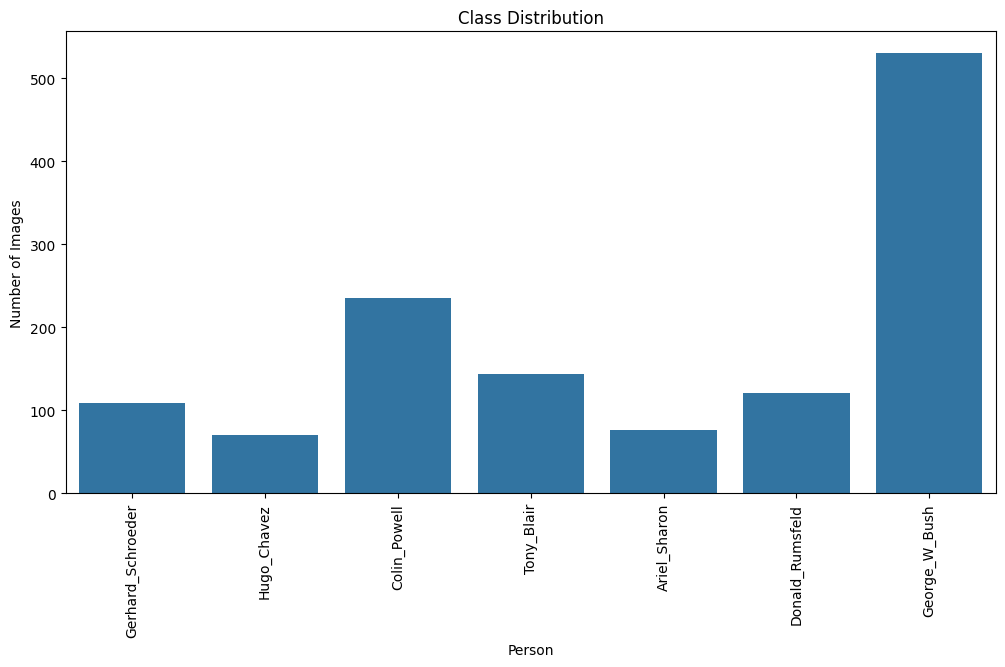

In [38]:
label_counts = Counter(y)
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=y)
plt.xlabel('Person')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()



In [39]:
print(x1[0].shape)

(250, 250, 3)


In [40]:
image_sizes = np.array([X[img].shape[:2] for img in range(5)])
print("Image Size Distribution:")
print("Width  Height")
for size in image_sizes:
    print(size[1], size[0])


Image Size Distribution:
Width  Height
250 250
250 250
250 250
250 250
250 250


# Calculate and visualize the color distribution of images in the dataset. This can help understand the dominant colors present in the images.

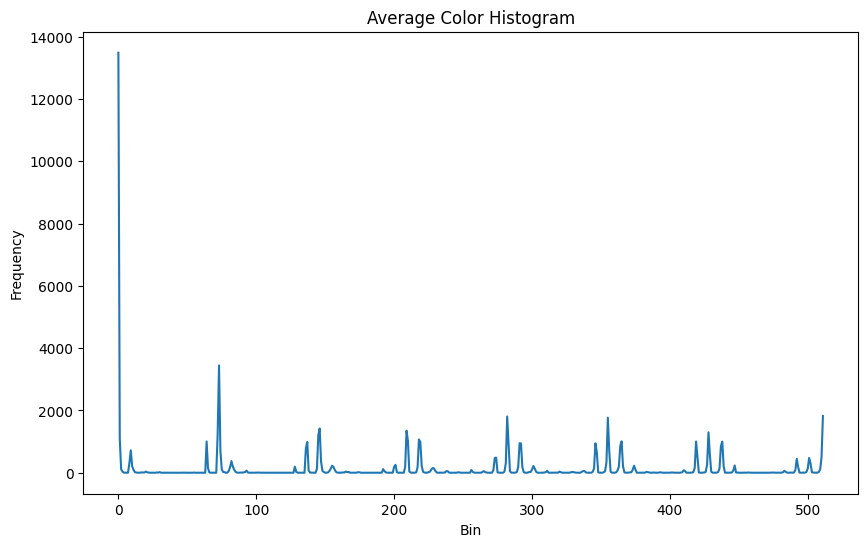

In [41]:
# Calculate color histograms for each image
color_histograms = [cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]) for img in X]

# Plot the average color histogram
average_histogram = np.mean(color_histograms, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(average_histogram.flatten())
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Average Color Histogram')
plt.show()


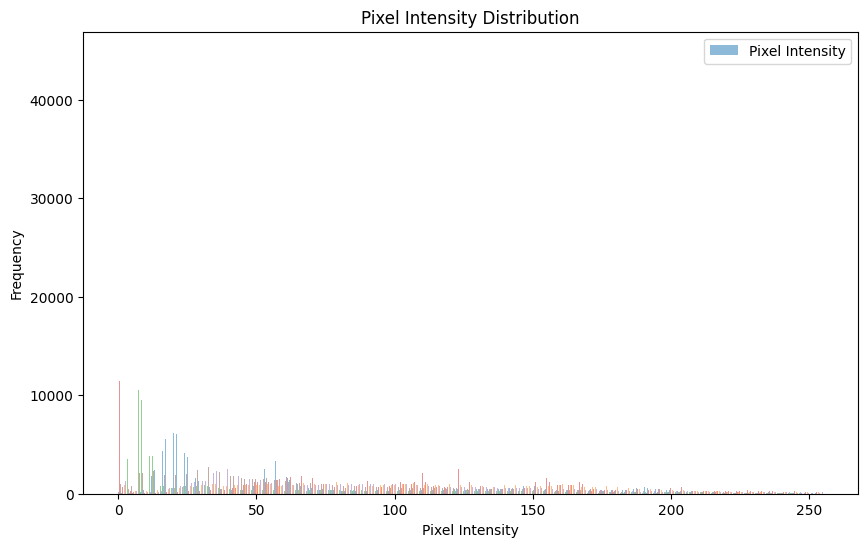

In [48]:
# Flatten the pixel intensities of each image
pixel_intensities = [img.flatten() for img in x1]

# Plot the pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(pixel_intensities, bins=256, alpha=0.5, label='Pixel Intensity')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
plt.legend()
plt.show()


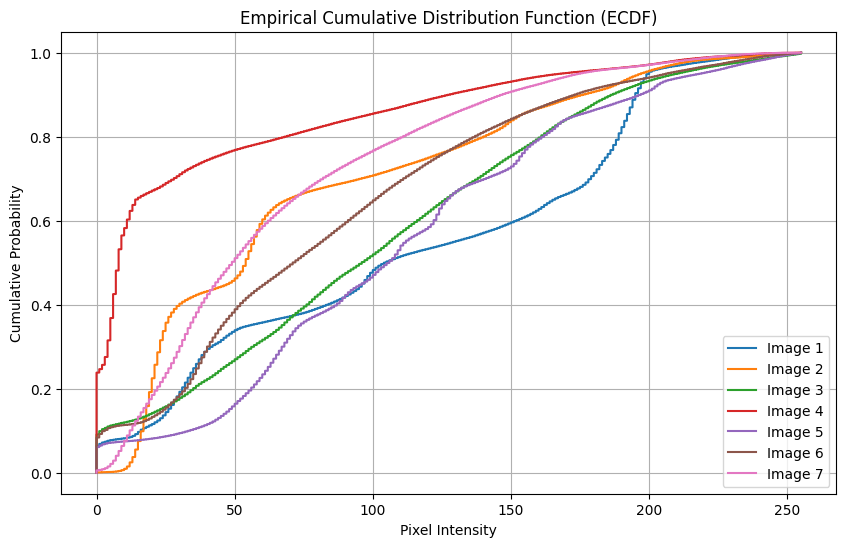

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example list x1 containing images (replace with your data)
 # Assuming x1 contains 7 images of shape (250, 250, 3)

# Flatten the pixel intensities of each image
pixel_intensities = [img.flatten() for img in x1]

# Function to compute the empirical cumulative distribution function (ECDF)
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Plot the ECDF for each image
plt.figure(figsize=(10, 6))
for i, intensities in enumerate(pixel_intensities):
    x_ecdf, y_ecdf = ecdf(intensities)
    plt.plot(x_ecdf, y_ecdf, label=f'Image {i+1}')

plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.legend()
plt.grid(True)
plt.show()


Image Edge Distribution:
Calculate and visualize the distribution of edge magnitudes in the images. This can provide insights into the amount of texture and detail present in the images.

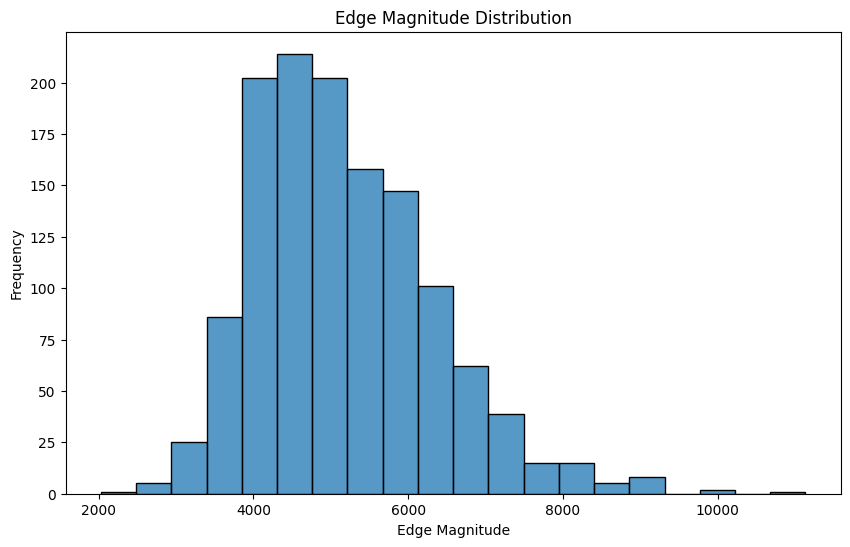

In [44]:
from skimage.feature import canny

# Calculate edge magnitudes for each image
edge_magnitudes = [np.sum(canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))) for img in X]

# Plot the edge magnitude distribution
plt.figure(figsize=(10, 6))
sns.histplot(edge_magnitudes, bins=20)
plt.xlabel('Edge Magnitude')
plt.ylabel('Frequency')
plt.title('Edge Magnitude Distribution')
plt.show()


Image Gradient Distribution:
Analyze the distribution of gradient magnitudes and orientations in the images. This can help understand the direction of edges and gradients in the images.

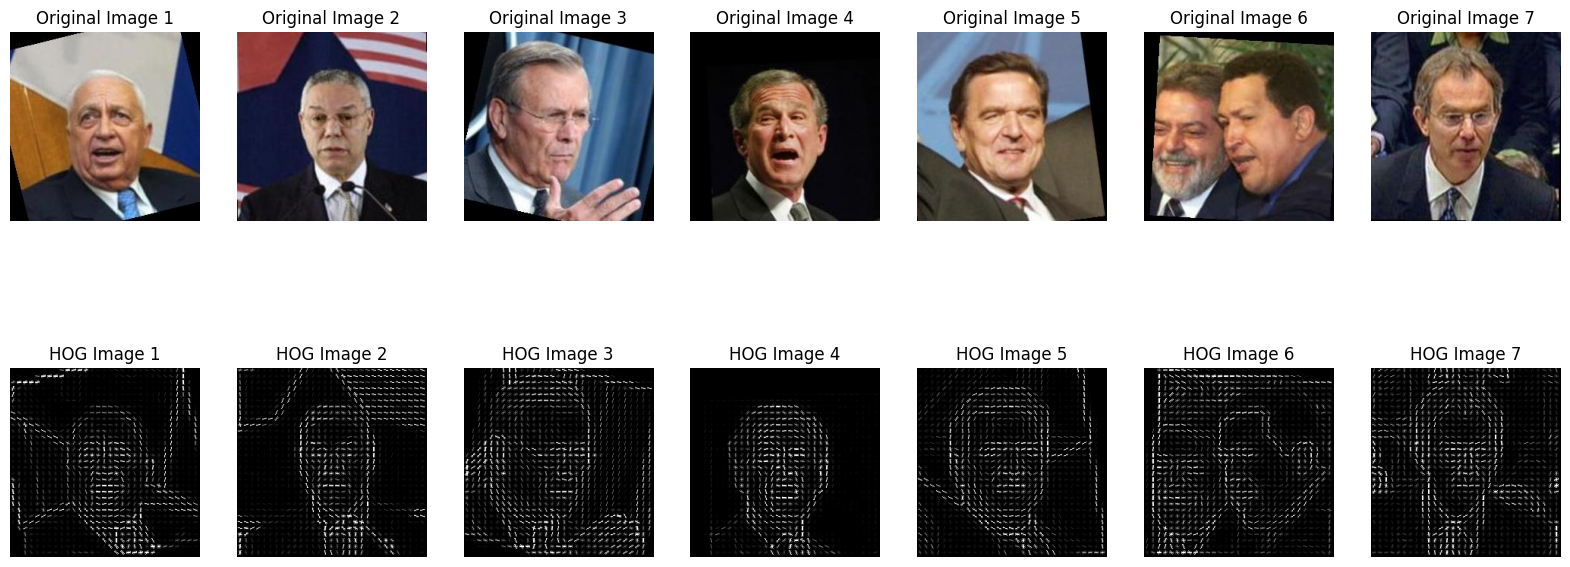

In [45]:
from skimage.feature import hog
from skimage import exposure
# Plot HOG features for all images in x1
plt.figure(figsize=(20, 8))
num_images = len(x1)
for i in range(num_images):
    # Calculate HOG features for the current image
    _, hog_image = hog(x1[i], orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=2)
    # Enhance the image contrast
    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 20))
    # Plot the original image
    plt.subplot(2, num_images, i+1)
    plt.imshow(x1[i])
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # Plot the HOG image
    plt.subplot(2, num_images, num_images+i+1)
    plt.imshow(hog_image, cmap='gray')
    plt.title(f'HOG Image {i+1}')
    plt.axis('off')

plt.show()


# Local Texture Patterns: Analyze the distribution of local texture patterns using LBP features. This can help understand the texture variations in the images.

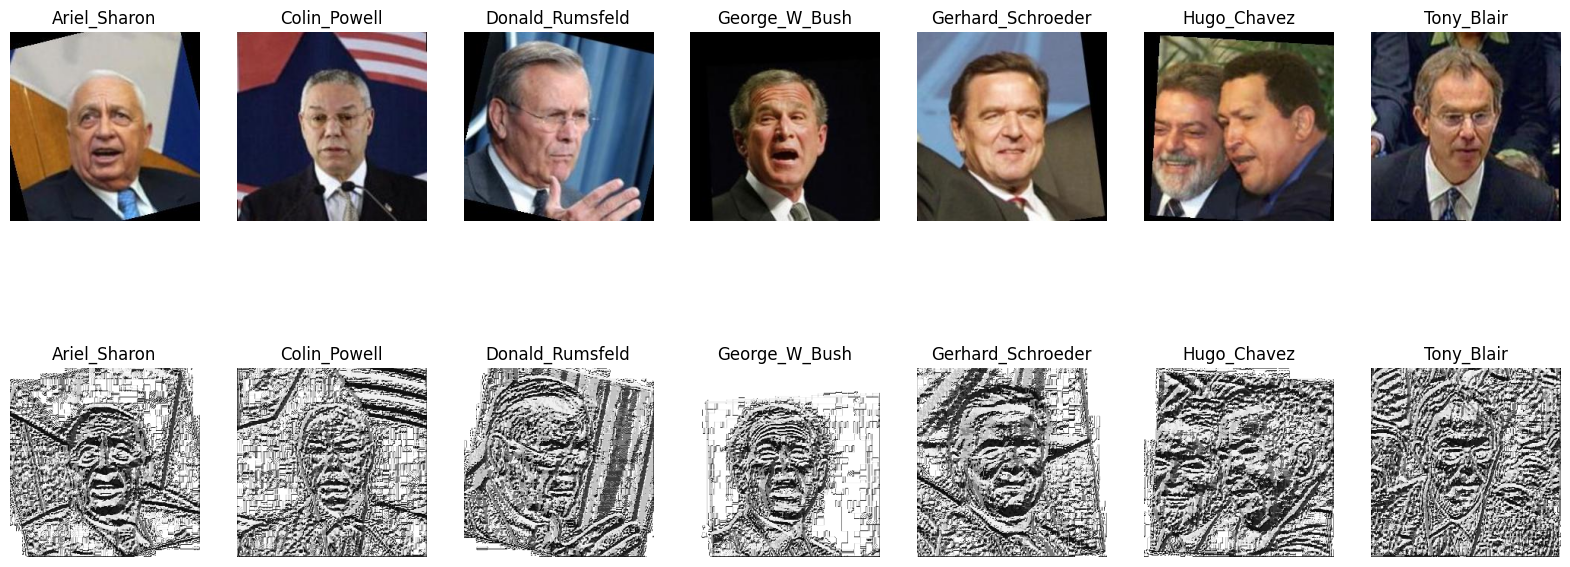

In [46]:
from skimage.feature import local_binary_pattern

# Plot LBP features for all images in x1
plt.figure(figsize=(20, 8))
num_images = len(x1)
for i in range(num_images):
    # Calculate LBP features for the current image
    lbp_image = local_binary_pattern(cv2.cvtColor(x1[i], cv2.COLOR_BGR2GRAY), P=8, R=1)

    # Plot the original image
    plt.subplot(2, num_images, i+1)
    plt.imshow(x1[i], cmap='gray')
    plt.title(f'{y1[i]}')
    plt.axis('off')

    # Plot the LBP image
    plt.subplot(2, num_images, num_images+i+1)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'{y1[i]}')
    plt.axis('off')

plt.show()
